<a href="https://colab.research.google.com/github/rodrigoamorteguiaros/Uniandes---Analytics/blob/master/E18_ClassHomeworksAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 18

## Analyze class homeworks


In [0]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/E18.xlsx')

#data.head()

# Exercise 18.1

Analyze the writing patterns of each student
- Frecuencias n-grams
- Frecuencias de palabras
- Palabras mas usadas por estudiante
- Clusters y reducir a componentes ppales

#### Se define funcion para concatenar los textos enviados

In [0]:
def concat(*args):
  strs = ''
  for arg in args:
      strs += arg
  return (strs)

#### Se eliminan los valores nulos y se concatenan todas las tareas en una variable nueva llamada Todo

In [0]:
data.fillna(' ',inplace=True)
data['Todo'] = concat(data['T1'],data['T2'],data['T3'],data['T4'],data['T5'],data['T6'])


#### Se instala la librerio stop-words, la cual contiene el idioma castellano 'spanish'

In [4]:
!pip install stop-words

  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


#### Se crea un vector por cada uno de los registros y se crea el diccionario por cada uno de los registros, aplicando stop_words en español y n_grams de 1 a 4.  Las dos nuevas filas resultantes, se adicionan al daframe 'data'.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')


salida = pd.DataFrame()
vect = []
docs = []

for indice_fila, fila in data.iterrows():
  X = [fila['Todo']]
  vect.append( CountVectorizer(encoding = 'string', stop_words = stop_words, ngram_range =(1,4)) )
  docs.append(vect[indice_fila].fit_transform(X))
  
data['vect'] = vect
data['docs'] = docs

#### Se instala libreria yellowbrick, la cual tiene metodos para graficar las palabras mas usadas

In [6]:
!pip install yellowbrick

#### Haciendo uso de la libreria yellowbrick, se diagraman las frecuencias de palabras para cada estudiante

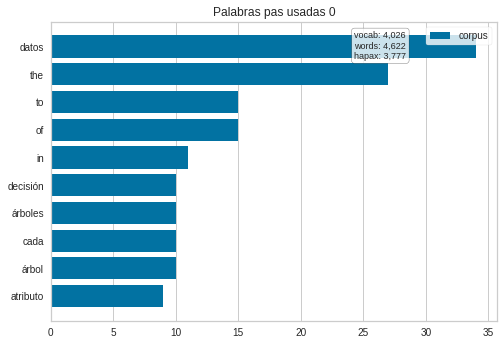

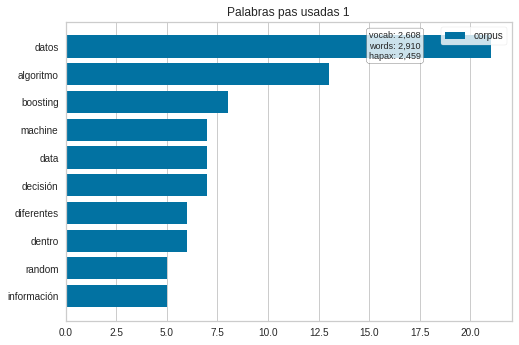

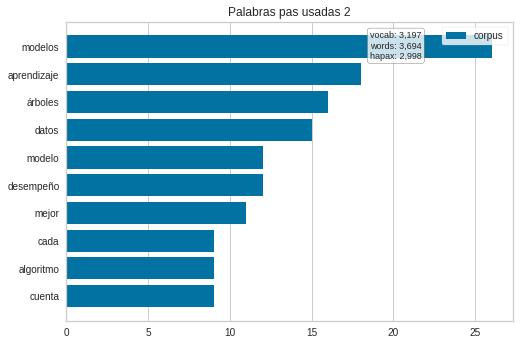

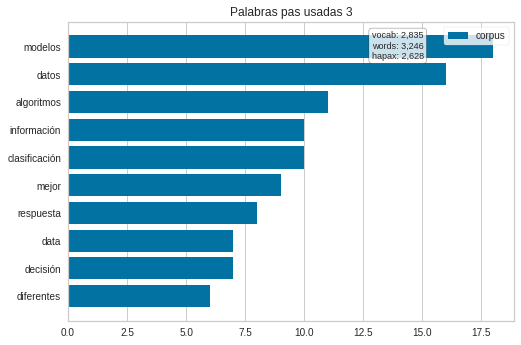

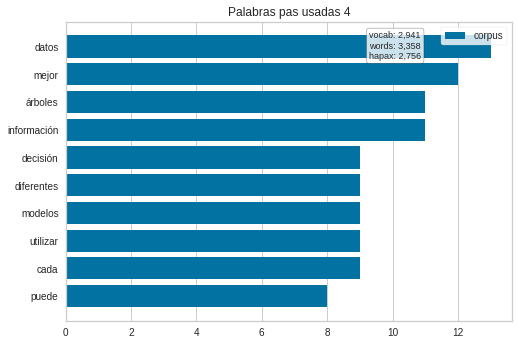

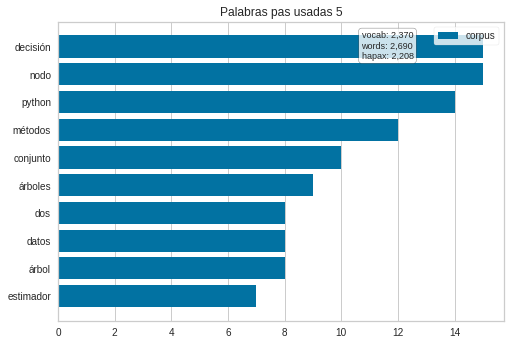

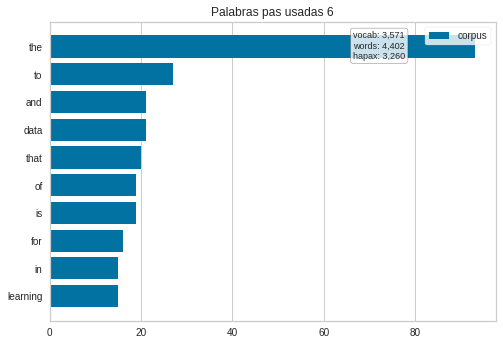

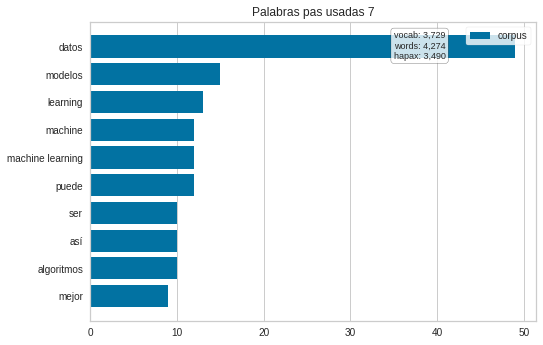

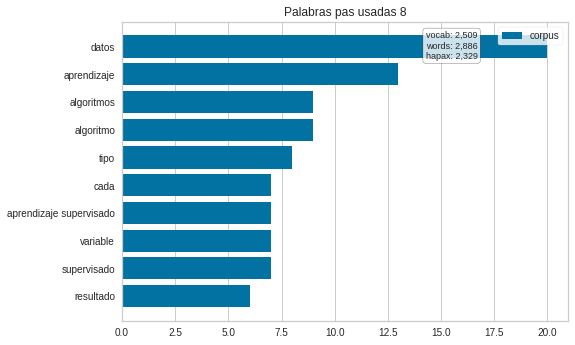

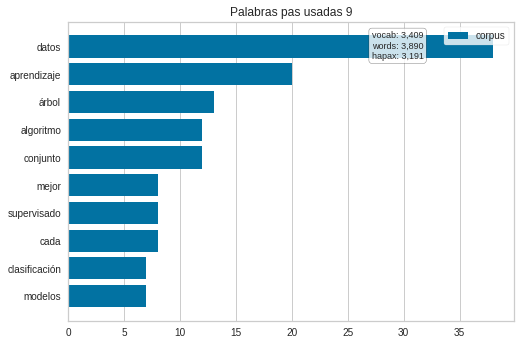

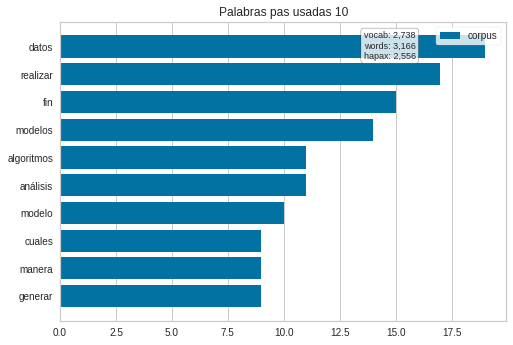

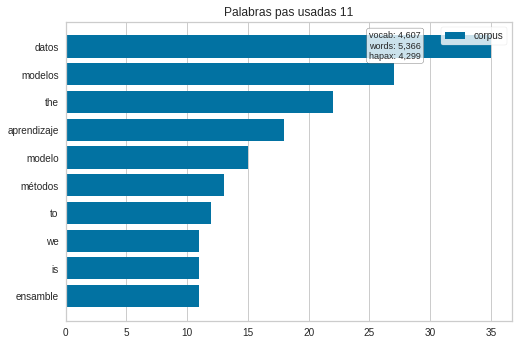

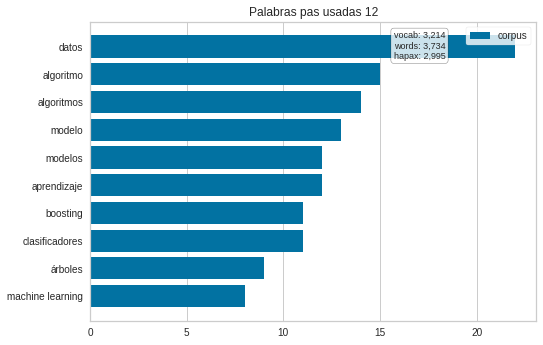

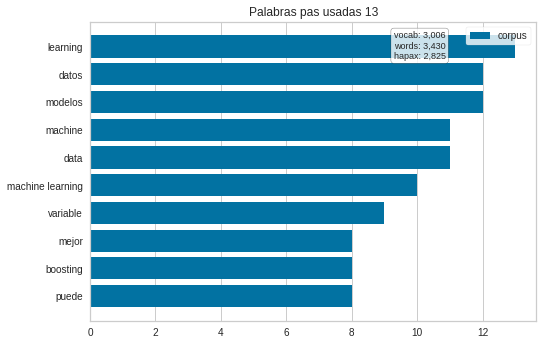

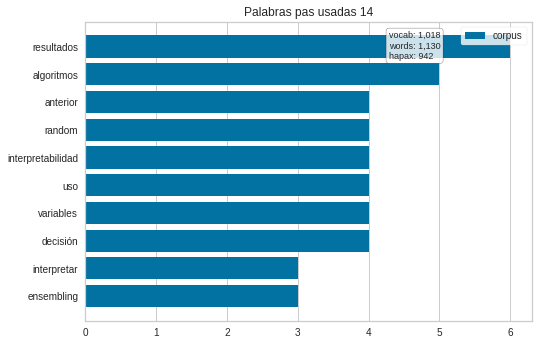

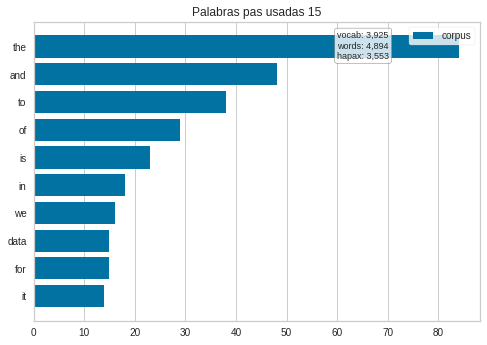

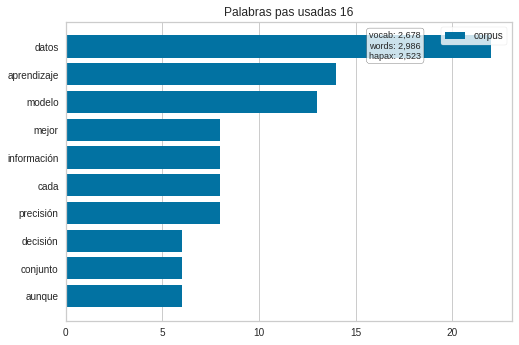

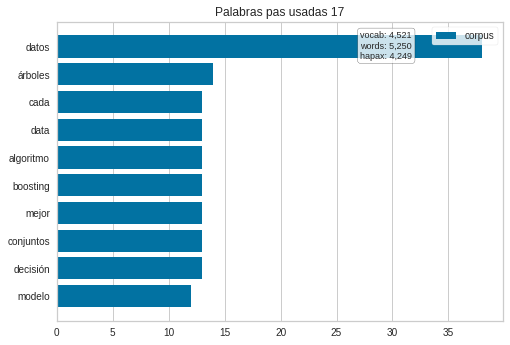

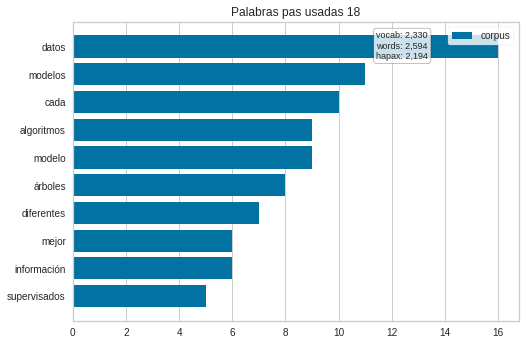

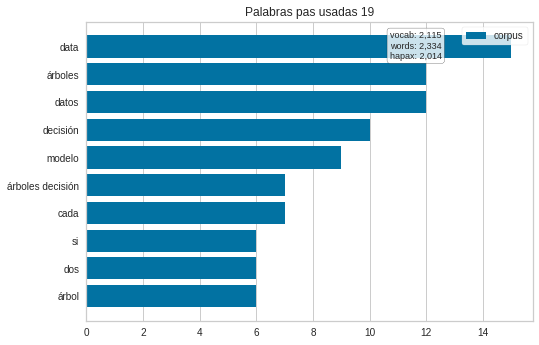

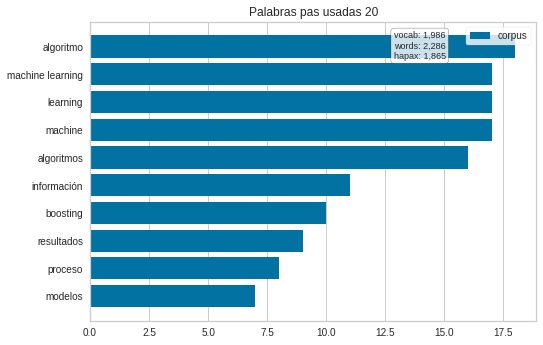

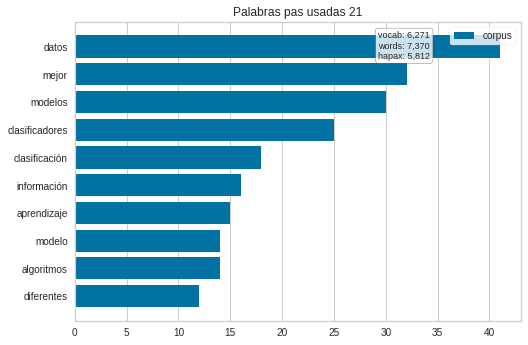

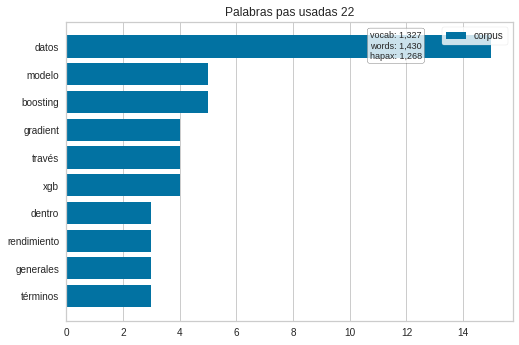

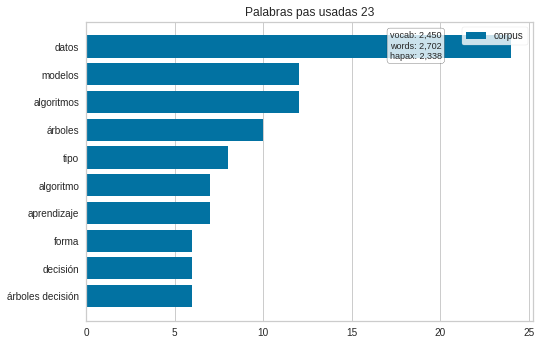

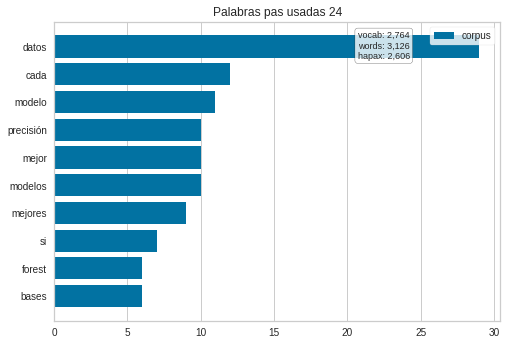

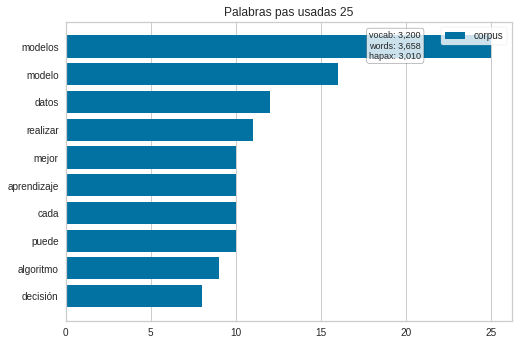

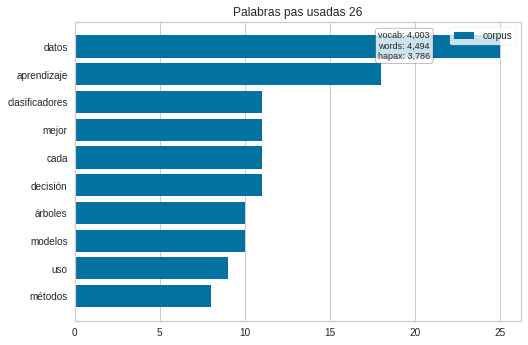

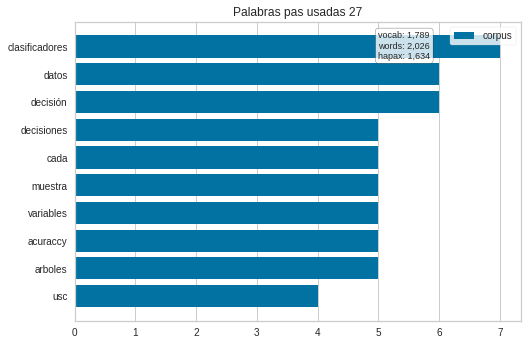

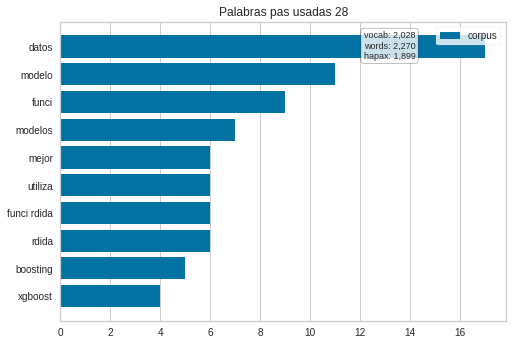

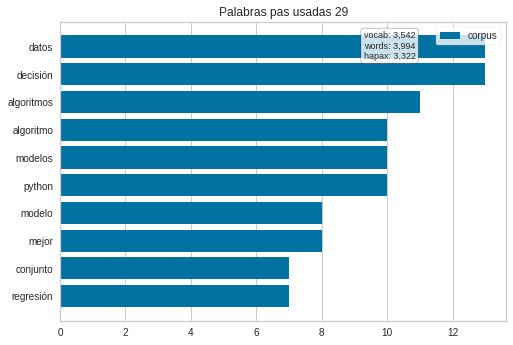

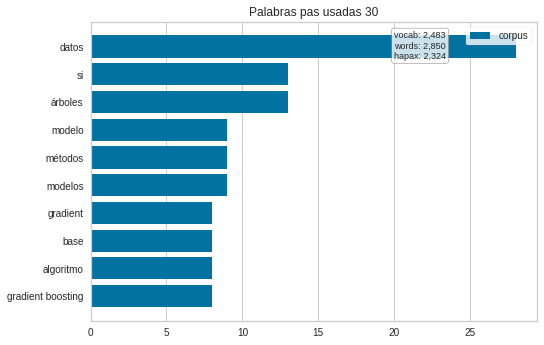

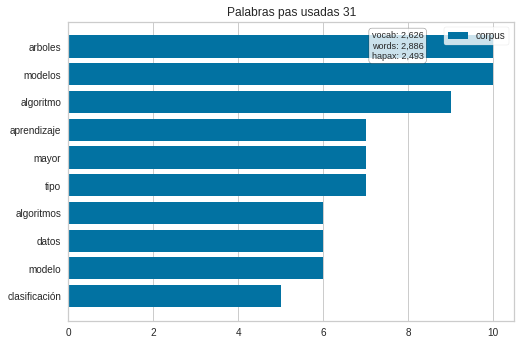

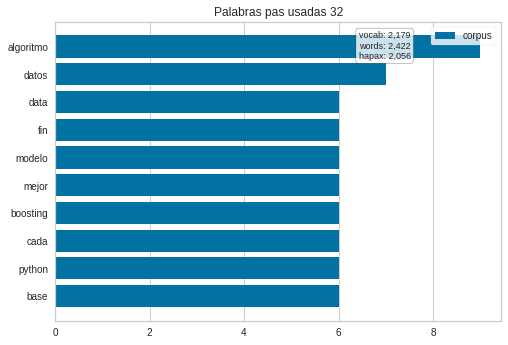

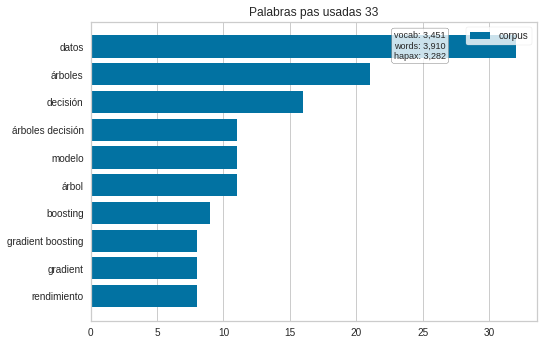

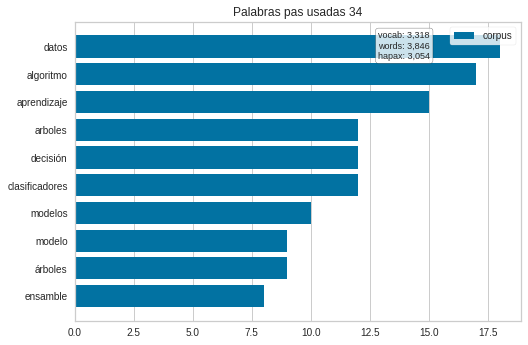

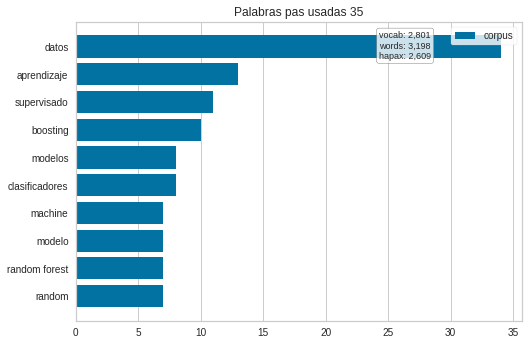

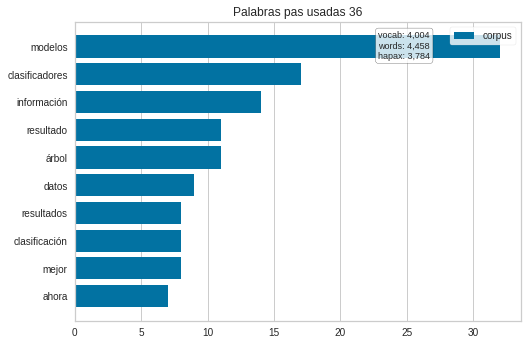

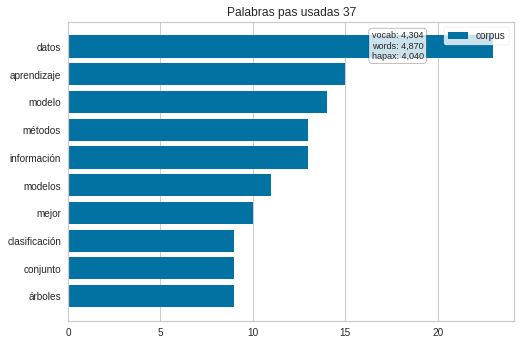

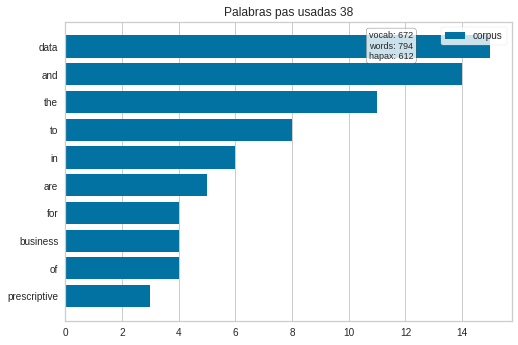

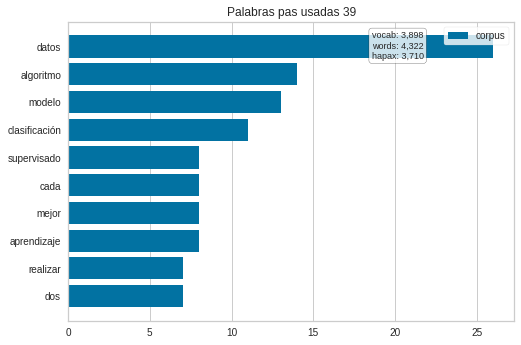

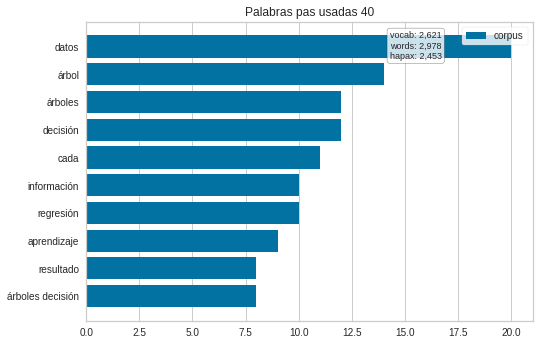

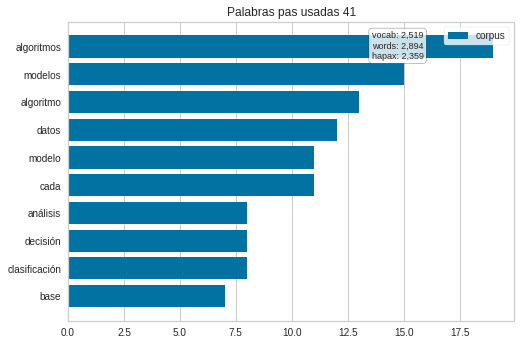

In [7]:
from yellowbrick.text.freqdist import FreqDistVisualizer

for indice_fila, fila in data.iterrows():
  features = fila['vect'].get_feature_names()
  
  visualizer = FreqDistVisualizer(features = features, n=10,title='Palabras pas usadas ' + str(indice_fila))
  visualizer.fit(fila['docs'])
  visualizer.poof()


# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

- Generar vector por usuario
- Resumenes.

#### Se instala la libreria textdistance, la cual tiene diferentes métodos para encontar similitudes entre palabras

In [8]:
!pip install textdistance

#### Mediante dos for anidados, se recorren los textos de cada estudiante comparandolo con los demás, para identificar similitud entre textos despues del pre-procesamiento.  La matriz resultado se adiciona al dataframe 'data', el cual contien la informacvión de cada estudiante.

In [0]:
import textdistance
minf=0
minc=0
min_td=1000000
td = 0

fila = []
for indice_fila_a, fila_a in data.iterrows():
  columna = []
  for indice_fila_b, fila_b in data.iterrows():
    #td = textdistance.hamming(fila_a['vect'].get_feature_names(), fila_b['vect'].get_feature_names() )
    td =  textdistance.hamming(fila_a['Todo'], fila_b['Todo'] )    
    if(td>0 & td < min_td):
      min_td=td
      minf=indice_fila_a
      minc=indice_fila_b
      
    columna.append( td   )
    
    
  fila.append(columna)  
  
data['result'] = fila
  
  

In [10]:
print('El valor con menor distancia es',min_td, ' correspondiente a los escritos de ' , minf ,' y ', minc)

El valor con menor distancia es 8760  correspondiente a los escritos de  41  y  40


In [11]:
data.iloc[40:42]

,Sexo,T1,T2,T3,T4,T5,T6,Todo,vect,docs,result
40,M,"Cuando se habla de un Data Engineer, se consid...","Dentro de la disciplina de Machine Learning, l...",Los árboles de decisión son una herramienta qu...,Los conjuntos son métodos que combinan árboles...,Es bien sabido que dentro de las matemáticas y...,,"Cuando se habla de un Data Engineer, se consid...","CountVectorizer(analyzer='word', binary=False,...","(0, 324)\t1\n (0, 1460)\t1\n (0, 2608)\t1\...","[10915, 8766, 10431, 8925, 9506, 8803, 8829, 1..."
41,H,Aunque un científico de datos y un ingeniero d...,Machine learning constituye el estudio científ...,Un árbol de decisión es una metodología asocia...,Los métodos de combinación de algoritmos de Ma...,El artículo ‘Do we Need Hundreds of Classifier...,,Aunque un científico de datos y un ingeniero d...,"CountVectorizer(analyzer='word', binary=False,...","(0, 82)\t1\n (0, 473)\t1\n (0, 703)\t1\n ...","[10936, 7893, 10477, 8985, 9627, 8037, 8003, 1..."


#### A continuacion se imprime la matriz resultado

In [12]:
print (data['result'])

0     [0, 10961, 10749, 10937, 10847, 10976, 10985, ...
1     [10961, 0, 10460, 8992, 9628, 7955, 7968, 1215...
2     [10749, 10460, 0, 10406, 10304, 10564, 10572, ...
3     [10937, 8992, 10406, 0, 9554, 9035, 9007, 1207...
4     [10847, 9628, 10304, 9554, 0, 9674, 9624, 1200...
5     [10976, 7955, 10564, 9035, 9674, 0, 7560, 1224...
6     [10985, 7968, 10572, 9007, 9624, 7560, 0, 1221...
7     [11924, 12150, 11924, 12071, 12006, 12242, 122...
8     [10956, 7954, 10478, 8947, 9628, 7862, 7899, 1...
9     [10959, 11131, 10998, 11079, 11042, 11188, 111...
10    [10842, 8948, 10375, 8948, 9529, 8981, 9004, 1...
11    [13234, 13400, 13174, 13357, 13257, 13499, 134...
12    [10825, 10569, 10333, 10432, 10412, 10635, 106...
13    [10817, 9699, 10394, 9641, 9548, 9744, 9718, 1...
14    [11314, 8266, 10855, 9278, 9974, 7657, 7867, 1...
15    [10974, 8230, 10471, 8995, 9586, 8263, 8300, 1...
16    [10949, 8337, 10462, 8962, 9591, 8425, 8419, 1...
17    [15137, 15280, 15068, 15155, 15172, 15335,

# Exercise 18.3

Create a classifier to predict the sex of each student



- Hombres mujesres (uso simbolos de puntuación)
- Adjetivos
- Hacer Oversampling


In [0]:
from imblearn.over_sampling import RandomOverSampler

In [0]:
X_arr = []
y_arr = []

for indice_fila, fila in data.iterrows():
  X_arr.append(fila['vect'].get_feature_names()     )
  y_arr.append(fila['Sexo'])

X = pd.DataFrame(X_arr)
y = pd.DataFrame(y_arr)
  

#X, y =  data['vect'].get_feature_names(),data['Sexo']

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_u, y_u = ros.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
pd.DataFrame(X_u).head(5)

,0,1,2,3,4,5,6,7,8,9,...,6261,6262,6263,6264,6265,6266,6267,6268,6269,6270
0,101,101 183,101 183 mil,101 183 mil dólares,121,121 bases,121 bases datos,121 bases datos implementados,123,123 170,...,None,None,None,None,None,None,None,None,None,None
1,121,121 datasets,121 datasets mayoría,121 datasets mayoría uci,17,17 familias,17 familias clasificadores,17 familias clasificadores incluyendo,179,179 algoritmos,...,None,None,None,None,None,None,None,None,None,None
2,121,121 bases,121 bases datos,121 bases datos buscando,17,17 diferentes,17 diferentes familias,17 diferentes familias 121,179,179 clasificadores,...,None,None,None,None,None,None,None,None,None,None
3,94,94 alcanzar,94 alcanzar mejor,94 alcanzar mejor accuracy,academias,academias percatado,academias percatado problema,academias percatado problema cambiando,accuracy,accuracy determinar,...,None,None,None,None,None,None,None,None,None,None
4,180,180 clasificadores,180 clasificadores diferentes,180 clasificadores diferentes fin,acciones,acciones va,acciones va aprendiendo,acciones va aprendiendo debido,accuracy,accuracy obtenido,...,None,None,None,None,None,None,None,None,None,None


In [17]:
y.head(5)

,0
0,H
1,H
2,H
3,M
4,H
